In [1]:
import pandas as pd
import seaborn as sns


In [2]:
data=pd.read_csv("../data/customer_dataset.csv", sep = ",")

In [3]:
from funpymodeling import status, profiling_num, cat_vars, num_vars
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailProvider,0,0.000000,0,0.000000,5,object


## 3. Variables numericas

array([[<Axes: title={'center': 'orderAmount'}>,
        <Axes: title={'center': 'transactionAmount'}>],
       [<Axes: title={'center': 'customerIPAddressVersion'}>, <Axes: >]],
      dtype=object)

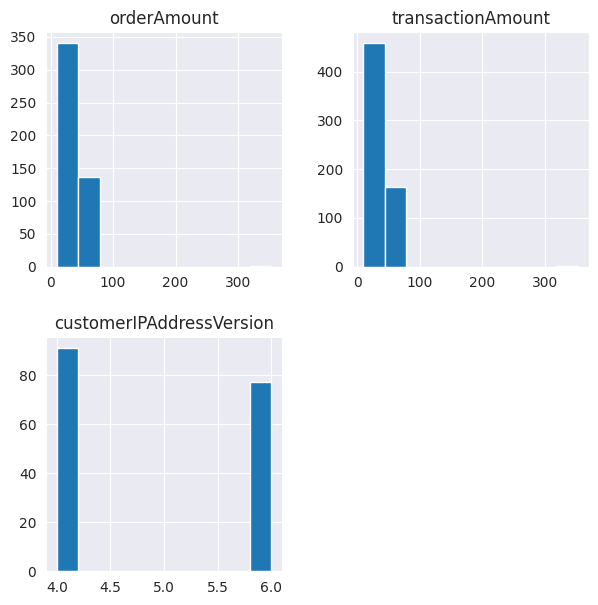

In [4]:
data.hist(figsize = (7,7))

In [5]:
from funpymodeling.exploratory import profiling_num

profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,orderAmount,35.606695,21.667298,0.608518,10.0,12.0,22.0,35.0,46.0,67.0,74.00
1,transactionAmount,34.598716,20.360247,0.588468,10.0,12.0,21.0,34.0,45.0,65.0,73.78
2,customerIPAddressVersion,4.916667,0.999501,0.203288,4.0,4.0,4.0,4.0,6.0,6.0,6.00


## 4. Variables categoricas

In [6]:
cat_vars(data)

Index(['orderState', 'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'fraudulent',
       'emailProvider', 'emailDomain', 'sameCity'],
      dtype='object')

### paymentMethodType

<Axes: xlabel='count', ylabel='paymentMethodType'>

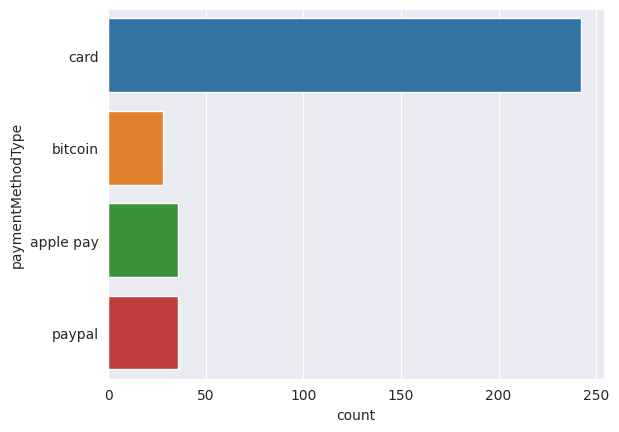

In [7]:
sns.countplot(y="paymentMethodType", data=data)

### Análisis cuantitativo de variables categoricas


In [8]:
from funpymodeling.exploratory import freq_tbl
t_payment = freq_tbl(data["paymentMethodType"])
t_payment.query("frequency > 30")["paymentMethodType"]

0         card
1    apple pay
2       paypal
Name: paymentMethodType, dtype: object

<Axes: xlabel='count', ylabel='fraudulent'>

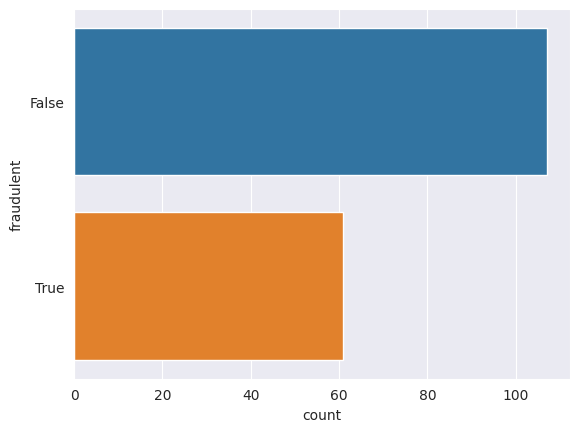

In [9]:
sns.countplot(y=data['fraudulent'])

<Axes: xlabel='count', ylabel='paymentMethodType'>

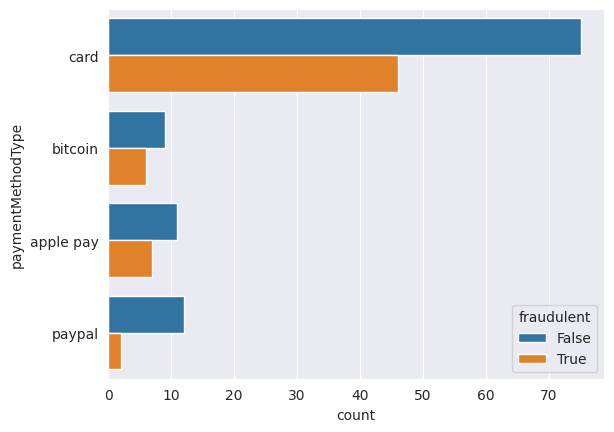

In [10]:
sns.countplot(y=data['paymentMethodType'], hue=data['fraudulent'])

## 5. Análisis bivariado

In [15]:
pd.crosstab(data['fraudulent'], data['transactionFailed'], margins=True)

transactionFailed,False,True,All
fraudulent,,,
False,73,34,107
True,44,17,61
All,117,51,168


In [16]:
pd.crosstab(data['fraudulent'], data['transactionAmount'], margins=True)

transactionAmount,10,11,12,14,15,16,18,19,20,21,...,58,59,65,66,68,69,71,74,75,All
fraudulent,,,,,,,,,,,,,,,,,,,,,
False,4,7,2,7,2,1,3,0,1,4,...,1,1,2,1,2,0,1,1,1,107
True,2,1,6,1,1,2,2,3,0,1,...,2,0,1,0,0,1,0,0,0,61
All,6,8,8,8,3,3,5,3,1,5,...,3,1,3,1,2,1,1,1,1,168


In [17]:
pd.crosstab(data['orderAmount'], data['transactionAmount'], margins=True)

transactionAmount,10,11,12,13,14,15,16,17,18,19,...,68,69,70,71,72,73,74,75,353,All
orderAmount,,,,,,,,,,,,,,,,,,,,,
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,8
11.0,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,15
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
13.0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
14.0,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
74.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
75.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [18]:
data.groupby('transactionAmount').mean()

/tmp/ipykernel_15341/3697649417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('transactionAmount').mean()


,orderAmount,transactionFailed,customerIPAddressVersion
transactionAmount,,,
10,67.300000,0.272727,5.333333
11,36.500000,0.300000,5.000000
12,33.071429,0.391304,5.750000
13,44.000000,0.000000,NaN
14,35.000000,0.458333,5.500000
...,...,...,...
72,30.200000,0.400000,NaN
73,42.000000,0.000000,NaN
74,29.250000,0.250000,6.000000


## 6. Graficos AED

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

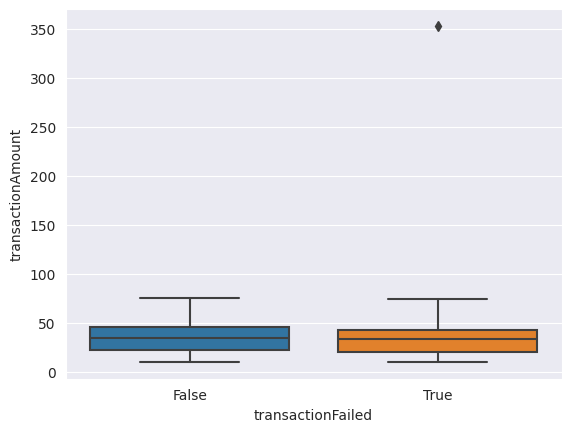

In [19]:
sns.boxplot(y = 'transactionAmount', x = 'transactionFailed', data = data)

<Axes: xlabel='fraudulent', ylabel='transactionAmount'>

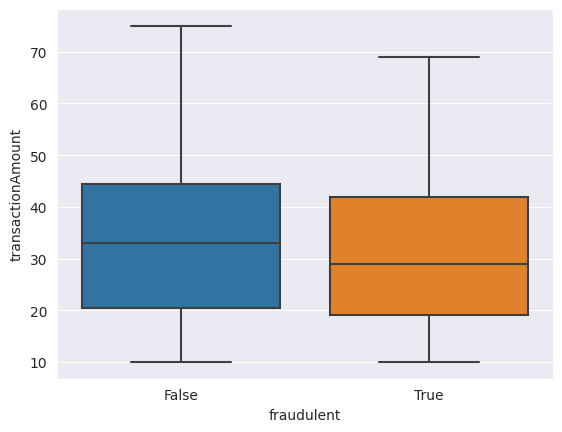

In [20]:
sns.boxplot(y = 'transactionAmount', x = 'fraudulent', data = data)

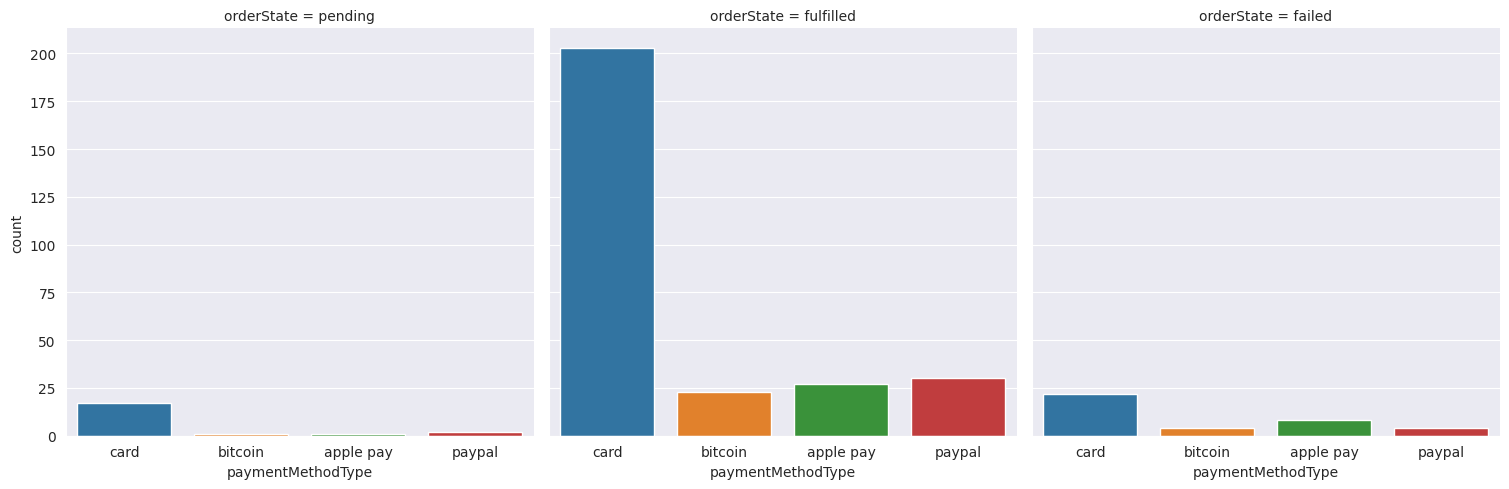

In [21]:
g = sns.catplot(x="paymentMethodType",
                col="orderState",
                data= data,
                kind="count")

In [22]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

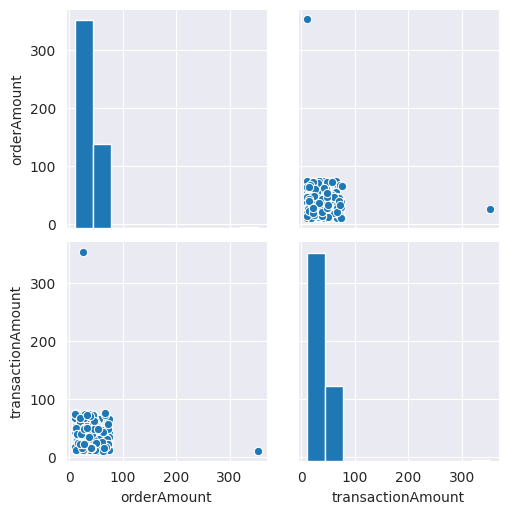

In [23]:
sns.pairplot(data_aux)

## 7. Analisis de correlacion

In [24]:
d_cor=data.corr()
d_cor

/tmp/ipykernel_15341/2741746826.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_cor=data.corr()


,orderAmount,transactionAmount,transactionFailed,customerIPAddressVersion
orderAmount,1.000000,-0.077408,-0.016296,0.025793
transactionAmount,-0.077408,1.000000,0.002385,-0.092369
transactionFailed,-0.016296,0.002385,1.000000,-0.035725
customerIPAddressVersion,0.025793,-0.092369,-0.035725,1.000000


In [25]:
data2=pd.get_dummies(data, dummy_na=True)

In [26]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,customerIPAddressVersion,455,0.730337,0,0.000000,2,float64
4,orderState_failed,0,0.000000,573,0.919743,2,uint8
...,...,...,...,...,...,...,...
63,emailDomain_nan,0,0.000000,623,1.000000,1,uint8
64,sameCity_no,0,0.000000,486,0.780096,2,uint8
65,sameCity_unknown,0,0.000000,139,0.223114,2,uint8
66,sameCity_yes,0,0.000000,621,0.996790,2,uint8


<Axes: >

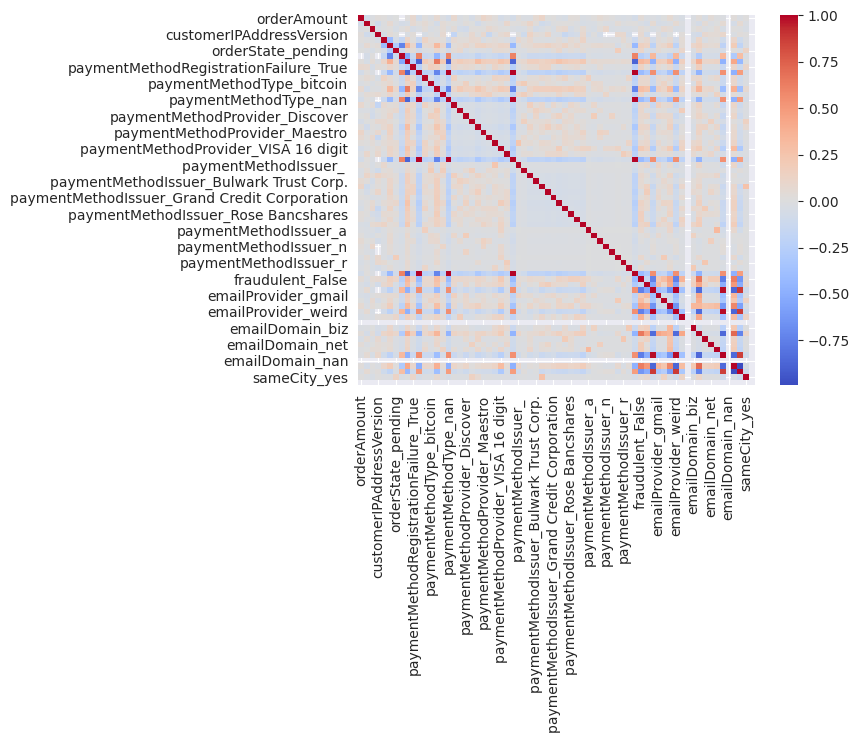

In [27]:
sns.heatmap(data2.corr(), cmap='coolwarm')

## 8. Insigths

- Si el proveedor es gmail es poco probable que sea fraude
- Si el metodo de pago es card es poco probable que sea fraude
- Si el metodo de pago es apple pay es poco probable que sea fraude
- Si el metodo de pago es paypal es poco probable que sea fraude


In [41]:
!pip install minepy

     |████████████████████████████████| 496 kB 1.5 MB/s eta 0:00:01
Using legacy 'setup.py install' for minepy, since package 'wheel' is not installed.
    Running setup.py install for minepy ... done
You should consider upgrading via the '/home/paco/py/edvai-final-project/venv/bin/python -m pip install --upgrade pip' command.


In [45]:
from minepy import MINE

In [46]:
# 1ro hago la especificación
mine = MINE(alpha=0.6, c=15, est="mic_approx")
# mine = MINE()

# 2do calculo de los estadísticos
mine.compute_score(data2['transactionAmount'], data2['transactionFailed'])

# 3ro acceso a los resultados (estadísticos)
mine.mic()

0.061135409260562004

In [47]:
import itertools
col_pairs=list(itertools.combinations(data2.columns, 2))

In [48]:
df_res = pd.DataFrame()

In [49]:
for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data2[a], data2[b])
    df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)

/tmp/ipykernel_15341/4218361962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
/tmp/ipykernel_15341/4218361962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
/tmp/ipykernel_15341/4218361962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
/tmp/ipykernel_15341/4218361962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
/tmp

In [51]:
sorted_df = df_res.sort_values(by="mic", ascending=False)

In [52]:
sorted_df.head(10)

,v1,v2,mic
931,paymentMethodType_nan,paymentMethodIssuer_nan,0.993073
241,customerIPAddressVersion,paymentMethodIssuer_nan,0.993073
661,paymentMethodRegistrationFailure_nan,paymentMethodIssuer_nan,0.993073
209,customerIPAddressVersion,paymentMethodType_nan,0.993073
1437,paymentMethodProvider_nan,paymentMethodIssuer_nan,0.993073
910,paymentMethodType_nan,paymentMethodProvider_nan,0.993073
629,paymentMethodRegistrationFailure_nan,paymentMethodType_nan,0.993073
220,customerIPAddressVersion,paymentMethodProvider_nan,0.993073
640,paymentMethodRegistrationFailure_nan,paymentMethodProvider_nan,0.993073
204,customerIPAddressVersion,paymentMethodRegistrationFailure_nan,0.993073
